# Goals:
1. Review Naive Bayes
2. Discuss what the different Naive Bayes classifiers are
3. Go through an example: this is taken from sklearn's website:
    https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
4. Python - Jupyter notebooks, what to turn in, how to view the data

Then:
Give a preview of what we'll talk about next time (evaluation)

## Useful packages

* Plotting: matplotlib
    other plotting tools: (seaborn, pandas, ...)

* pandas: good for data manipulation (dataframes, reading CSV's) 

* numpy: math in python, numpy arrays are especially useful

To save your script (to turn in), go to File, Download As, and select .py.

Note: To add a python hook to do so a, edit the jupyter config file (e.g. vim ~/.jupyter/jupyter_notebook_config.py) and add a post-save hook code block from the example: https://jupyter-notebook.readthedocs.io/en/stable/extending/savehooks.html

In [2]:
from sklearn import datasets
import pylab

## Data manipulation and exploratory data analysis

In [3]:
iris = datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# 4 dimensional matrix X
X_train = iris.data

In [8]:
X_train

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y_train = iris.target

In [10]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# extract a row
iris.data[1]

array([4.9, 3. , 1.4, 0.2])

In [12]:
# extract a column
iris.data[:,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

Text(0.5,1,'2D plot of Iris data')

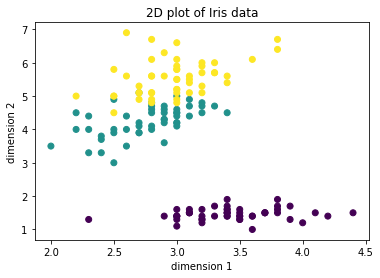

In [13]:
# plot the dimensions 1, 2 (note: the first dimension is 0)
pylab.scatter(iris.data[:,1],iris.data[:,2], c=iris.target)

# always label both axes for any plot so the reader can interpret it
pylab.xlabel("dimension 1")
pylab.ylabel("dimension 2")

# sometimes titles are helpful
pylab.title("2D plot of Iris data")

# TODO:
# add a legend explaining what the colors are

Text(0.5,1,'2D plot of Iris data')

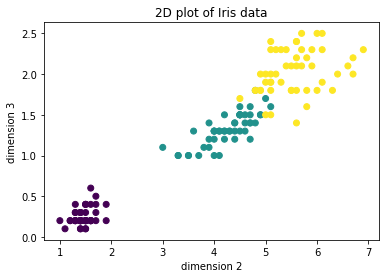

In [14]:
# plot dimensions 2 and 3
pylab.scatter(iris.data[:,2],iris.data[:,3], c=iris.target)

# always label the dimensions
pylab.xlabel("dimension 2")
pylab.ylabel("dimension 3")

# sometimes titles are helpful
pylab.title("2D plot of Iris data")

# TODO:
# add a legend explaining what the colors are

Recap: making plots is important for exploratory data analysis.
Good thing to include a careful exploratory data analysis in your report to help you motivate why you chose a certain model or class of models.

# Classification

Now we step through the classification part from the sklearn example.

In [15]:
# Question: why is the Gaussian one the right one to use here?
from sklearn.naive_bayes import GaussianNB

In [16]:
gnb = GaussianNB()

In [17]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
# fit the training data w/ the Gaussian NB classifier
trained_classifier = gnb.fit(iris.data, iris.target)

In [21]:
# pressing tab at the period lets you see different functions/variables
trained_classifier.

<bound method BaseNB.predict_proba of GaussianNB(priors=None, var_smoothing=1e-09)>

In [20]:
# making predictions on data set - here we just use the original training set but normally want e.g. a test set
predictions = trained_classifier.predict(iris.data)

In [21]:
# predicted labels
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# true labels
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Generative models intro

Data distribution: think carefully about how the data are generated.
The above data were real-valued, so we chose to think about Gaussian-distributed data.

Some examples below about how to generate simulated data from these distributions.

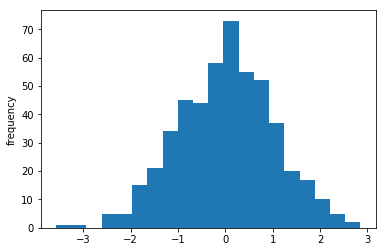

In [23]:
# generate 500 Normal(0,1) samples
data = np.random.normal(0,1,500)

pylab.hist(data, bins=20)
pylab.ylabel("frequency");

In [24]:
# generate 10 Multinomial(5, p=(0.2,0.3,0.5)) samples
data = np.random.multinomial(5, [0.2,0.3,0.5],10)

In [25]:
# each row is a sample - the counts sum to 5
data

array([[0, 3, 2],
       [2, 0, 3],
       [1, 2, 2],
       [0, 3, 2],
       [1, 3, 1],
       [1, 3, 1],
       [0, 3, 2],
       [0, 1, 4],
       [2, 1, 2],
       [0, 2, 3]])

In [26]:
# sum up rows
rowsum = data.sum(0)
# compute the proportions
rowsum / data.sum()

array([0.14, 0.42, 0.44])

In [27]:
# Now take a larger sample
data = np.random.multinomial(5, [0.2,0.3,0.5],100)
# sum up rows
rowsum = data.sum(0)
# compute the proportions - with a larger sample we can see it approaches the probabilities used to generate them
rowsum / data.sum()

array([0.164, 0.338, 0.498])

# What else? 

We expect you to read through each method and see what each of the parameters are and be able to explain what they mean and why you chose certain parameters.

For example: for counts / discrete data:

Smoothing priors: accounts for features not present in the learning sample
alpha = 1 is called Laplace smoothing or add-one smoothing and is a commonly used thing for NLP tasks
https://en.wikipedia.org/wiki/Additive_smoothing (this is the default in sklearn)

